GARCH Volatility Forcasting

In [24]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [25]:
start = datetime(2000, 1, 1)
end = datetime(2024, 9, 1)

spy = yf.Ticker("SPY")
hst = spy.history(start=start, end=end)

returns = 100 * hst.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

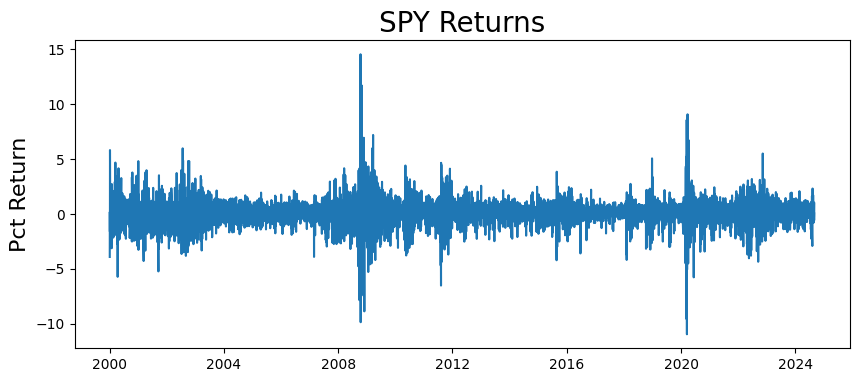

In [26]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

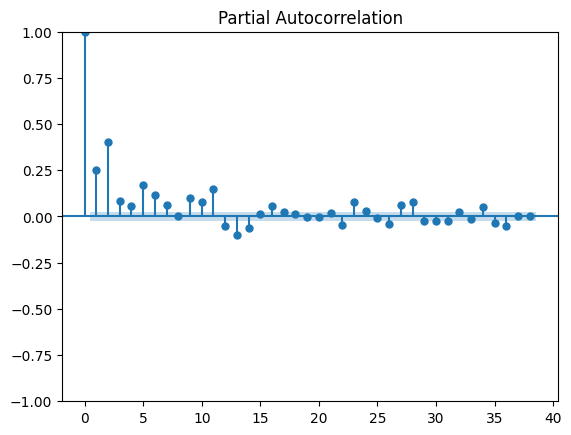

In [27]:
plot_pacf(returns**2)
plt.show()

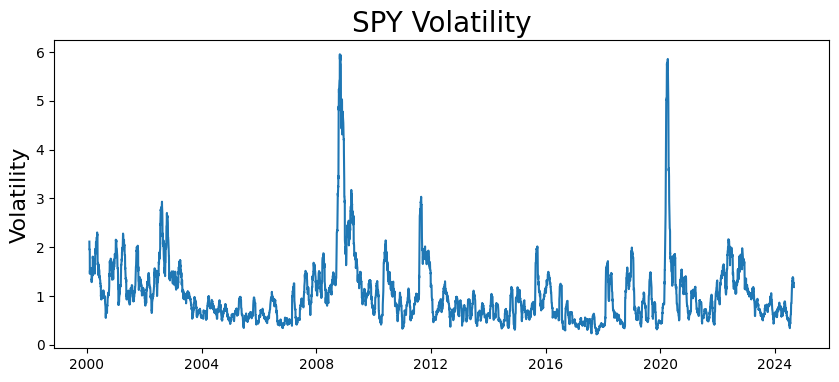

In [36]:
# Calculate the rolling standard deviation (volatility)
volatility = np.sqrt(returns.rolling(window=21).var())

# Plot the volatility
plt.figure(figsize=(10, 4))
plt.plot(volatility)
plt.ylabel('Volatility', fontsize=16)
plt.title('SPY Volatility', fontsize=20)
plt.show()

In [29]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 119278.27234588652
Iteration:      2,   Func. Count:     21,   Neg. LLF: 36087.15915779857
Iteration:      3,   Func. Count:     32,   Neg. LLF: 13158.12499157746
Iteration:      4,   Func. Count:     41,   Neg. LLF: 11436.612875772411
Iteration:      5,   Func. Count:     50,   Neg. LLF: 8712.73727134053
Iteration:      6,   Func. Count:     58,   Neg. LLF: 8527.646198525204
Iteration:      7,   Func. Count:     66,   Neg. LLF: 8528.947707638757
Iteration:      8,   Func. Count:     74,   Neg. LLF: 8583.186186800769
Iteration:      9,   Func. Count:     83,   Neg. LLF: 8522.237085064597
Iteration:     10,   Func. Count:     90,   Neg. LLF: 8522.211035753851
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8522.209198612476
Iteration:     12,   Func. Count:    104,   Neg. LLF: 8522.20910456286
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8522.20910359258
Optimization terminated successfully    (Exit mode 0)
           

Fit Model

In [30]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

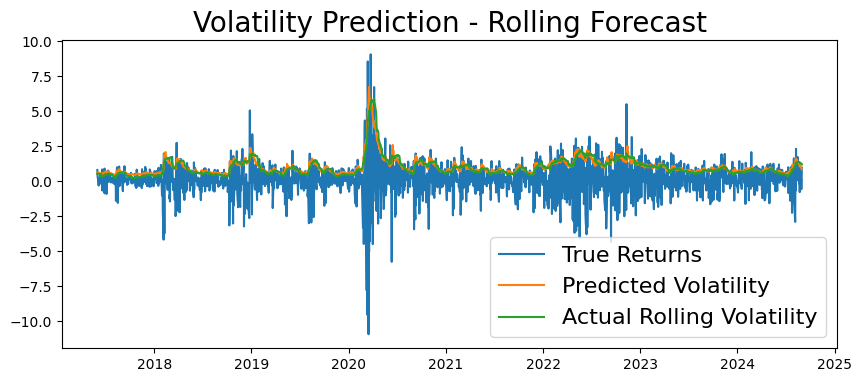

In [38]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
vol, = plt.plot(volatility[-365*5:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility', 'Actual Rolling Volatility'], fontsize=16)